In [91]:
import pandas as pd

rating = pd.read_csv("ratings.csv")
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
rating.shape

(100836, 4)

#Translating columns to Portuguese

In [92]:
rating.columns = ["usuarioId", "filmeId", "Nota", "momento"]
rating.head()

,usuarioId,filmeId,Nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#Displaying only unique column values

In [ ]:
rating["Nota"].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

#Counting occurrences

In [ ]:
rating["Nota"].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: Nota, dtype: int64

Calculating average and median

In [ ]:
print("Media:",rating["Nota"].mean())
print("Mediana:",rating["Nota"].median())

Media: 3.501556983616962
Mediana: 3.5


#Plotting

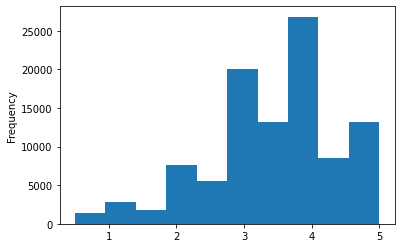

In [ ]:
rating.Nota.plot(kind='hist')

In [ ]:
rating.Nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: Nota, dtype: float64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


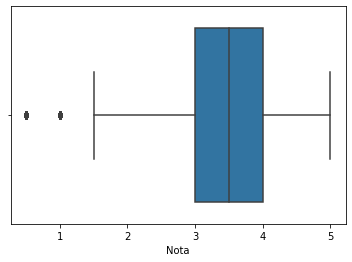

In [31]:
import seaborn as sns

sns.boxplot(rating.Nota)

#Load movies.csv

In [4]:
movies = pd.read_csv("movies.csv")
#rename columns
movies.columns = ["filmeId", "Titulo", "Genero"]
movies.head()

,filmeId,Titulo,Genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#Showing  the average ratings of a film

In [14]:
rating.query("filmeId == 1").Nota.mean()

3.9209302325581397

In [13]:
rating.query("filmeId == 2").Nota.mean()

3.4318181818181817

#Group average ratings by filmeId

In [27]:
average_by_movie = rating.groupby("filmeId").mean().Nota
average_by_movie.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: Nota, dtype: float64

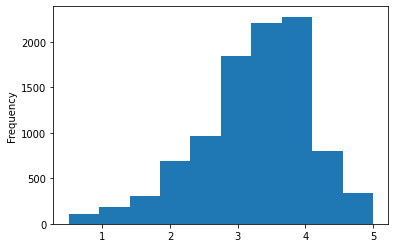

In [30]:
average_by_movie.plot(kind="hist")

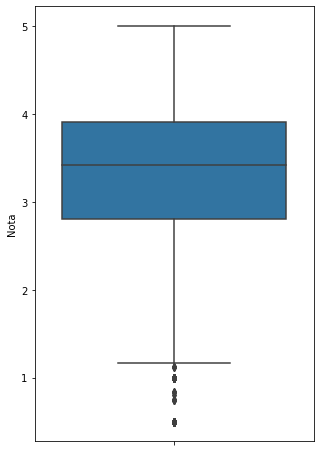

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))
sns.boxplot(y=average_by_movie)

In [34]:
average_by_movie.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: Nota, dtype: float64

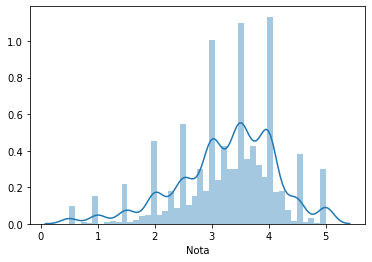

In [37]:
sns.distplot(average_by_movie)
#sns.distplot(average_by_movie, bins=10)

Text(0.5, 1.0, 'Histograma das medias dos filmes')

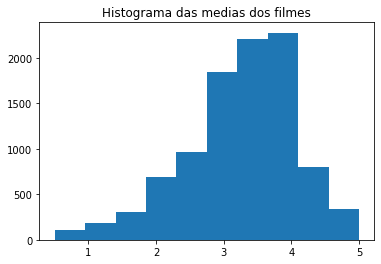

In [39]:
plt.hist(average_by_movie)
plt.title("Histograma das medias dos filmes")

In [42]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [50]:
tmdb.original_language.unique() #nominal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [46]:
tmdb["original_language"].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ro', 'ta', 'ar', 'id', 'cs', 'vi',
       'ps', 'hu', 'ky', 'el', 'af', 'xx', 'pl', 'tr', 'is', 'sl', 'te', 'nb',
       'no'],
      dtype='object')

In [51]:
tmdb["original_language"].value_counts() #serie

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ro       2
ta       2
ar       2
id       2
cs       2
vi       1
ps       1
hu       1
ky       1
el       1
af       1
xx       1
pl       1
tr       1
is       1
sl       1
te       1
nb       1
no       1
Name: original_language, dtype: int64

In [47]:
tmdb["original_language"].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

#Making a dataframe

In [52]:
tmdb["original_language"].value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ru,11


#Removing the index

In [54]:
language_count = tmdb["original_language"].value_counts().to_frame().reset_index()
language_count.columns = ["original_language", "total"]
language_count.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


#Plotting with categorical data
https://seaborn.pydata.org/tutorial/categorical.html

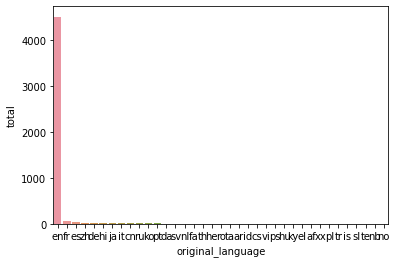

In [55]:
sns.barplot(x = "original_language", y = "total", data = language_count)

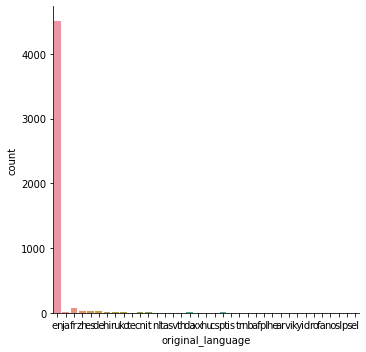

In [56]:
sns.catplot(x = "original_language", kind = "count", data = tmdb)

#Improving data visualization

In this data set, English stands out in relation to other languages.
We will establish a comparison between English and all other languages.

We will assign the total count of the values ​​in original_language to a variable total_language. On this variable, the "loc" attribute will be executed, passing "en" as a parameter

A total variable will also be created, which is the sum of all the values ​​in total_language. The remaining variable will be the subtraction between total and english_total

In [62]:
total_language = tmdb["original_language"].value_counts()
total = total_language.sum()
english_total = total_language.loc["en"]
remaining = total - english_total
print(english_total, remaining)

4505 298


#Making a dataframe to plot
Creating a dictionary.
Then using the DataFrame() function, passing the data as parameters.

In [64]:
language_data = {
    'language' : ['english', 'others'],
    'total' : [english_total, remaining]
}
language_data = pd.DataFrame(language_data)
language_data

,language,total
0,english,4505
1,others,298


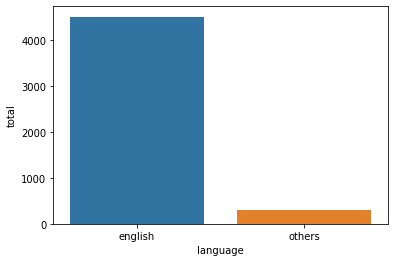

In [65]:
sns.barplot(data = language_data, x = "language", y = "total" )

([<matplotlib.patches.Wedge at 0x7fbd466879e8>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'english'),
  Text(1.0791697511565306, -0.2130555049482467, 'others')])

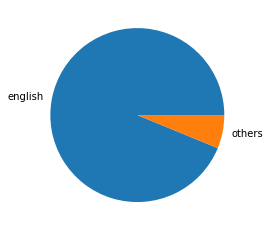

In [66]:
plt.pie(language_data["total"], labels=language_data["language"])

#Improving "others"
removing from the dataset all elements that do not share the English language.

In [73]:
total_of_other_languages = tmdb.query("original_language != 'en'").original_language.value_counts()
total_of_other_languages


fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ru    11
ko    11
pt     9
da     7
sv     5
nl     4
fa     4
th     3
he     3
ar     2
ro     2
cs     2
ta     2
id     2
pl     1
no     1
vi     1
te     1
ky     1
ps     1
nb     1
af     1
hu     1
el     1
sl     1
tr     1
xx     1
is     1
Name: original_language, dtype: int64

#Plotting
Setting total_of_other_languages, then the initial query films_without_original_language_in_english


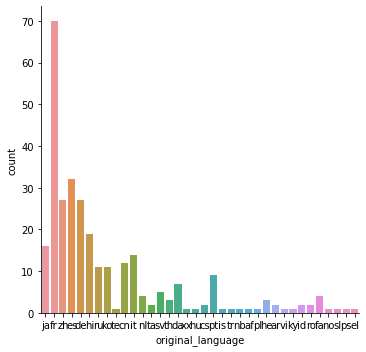

In [75]:
films_without_original_language_in_english = tmdb.query("original_language != 'en'")
sns.catplot(x ="original_language", kind="count", data = films_without_original_language_in_english )

#Improving Size
https://seaborn.pydata.org/generated/seaborn.catplot.html

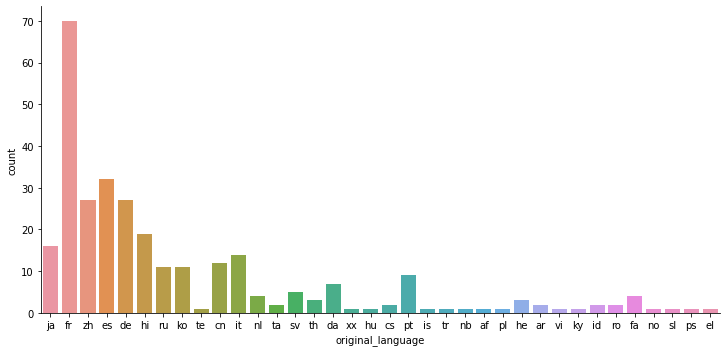

In [77]:
sns.catplot(x ="original_language", kind="count", data = films_without_original_language_in_english, aspect=2)

#Sorting values
Using the catplot () function, with the order argument

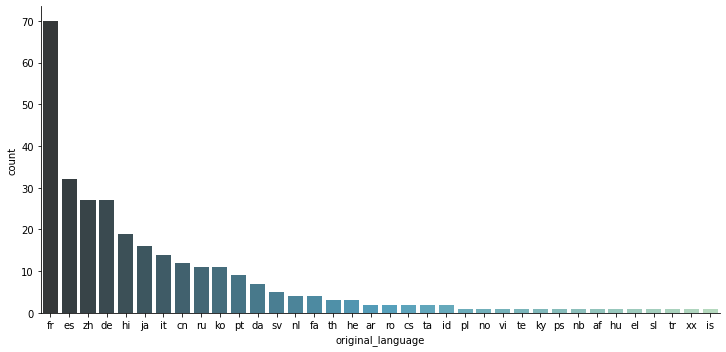

In [84]:
#total_of_other_languages = tmdb.query("original_language != 'en'").original_language.value_counts()
sns.catplot(x ="original_language", kind="count", data = films_without_original_language_in_english,
            aspect=2,
            palette="GnBu_d", #changing colors
            order = total_of_other_languages.index)

In [101]:
toy_story = rating.query("filmeId == 1")
jumanji = rating.query("filmeId == 2")
print(f'Quantidade Toy Story: {len(toy_story)} Quantidade Jumanji: {len(jumanji)}')
print('Nota media Toy Story: %.2f' % toy_story.Nota.mean())
print('Nota media Toy Jumanji: %.2f'% jumanji.Nota.mean())

Quantidade Toy Story: 215 Quantidade Jumanji: 110
Nota media Toy Story: 3.92
Nota media Toy Jumanji: 3.43


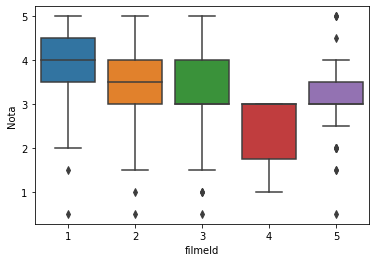

In [106]:
sns.boxplot(x = "filmeId", y = "Nota",data = rating.query("filmeId in [1,2,3,4,5]"))

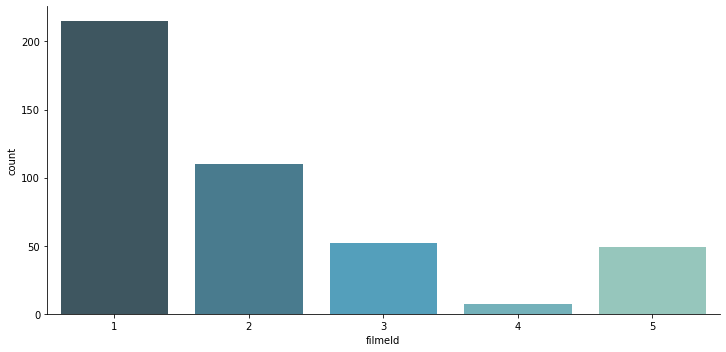

In [115]:
sns.catplot(x ="filmeId", kind="count", data = rating.query("filmeId in [1,2,3,4,5]"),
            aspect=2,
            palette="GnBu_d")

#Standard deviation

In [117]:
import numpy as np

print(toy_story.Nota.std(), toy_story.Nota.std())
print(np.std())

0.8348591407114045 0.8348591407114045
